In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [48]:
data=pd.read_csv(r'salary.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [49]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
data['workclass'].value_counts() 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [58]:
data.replace(' ?',np.nan,inplace=True)

In [59]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [98]:
data['workclass'].replace(np.nan,'private',inplace=True)

In [187]:
data.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [156]:
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [158]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [210]:
c=0
for i in range(len(data)):
    if data.loc[i,'education']==' Preschool':     
        if data.loc[i,'occupation']==np.nan:
            c+=1
            
print(c)

0


In [207]:
data['occupation'].replace(np.nan,'Other-service',inplace=True)

In [208]:
data.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    583
salary              0
dtype: int64

In [222]:
data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [220]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [244]:
data.drop('native-country',axis=1,inplace=True)

In [245]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
salary            0
dtype: int64

<AxesSubplot:>

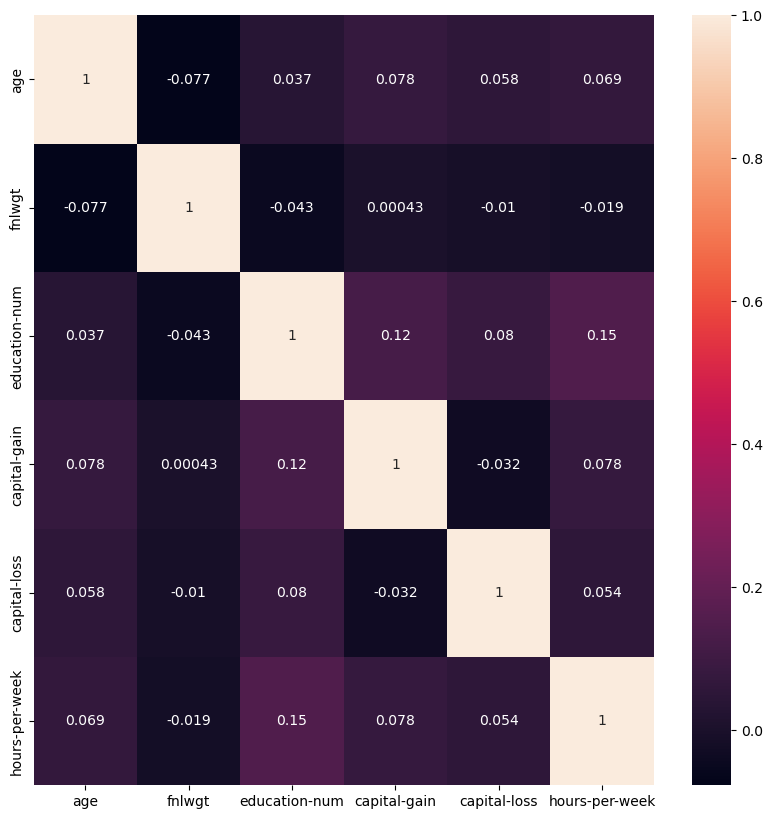

In [250]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [251]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['workclass']=le.fit_transform(data['workclass'])
data['education']=le.fit_transform(data['education'])
data['marital-status']=le.fit_transform(data['marital-status'])
data['occupation']=le.fit_transform(data['occupation'])
data['relationship']=le.fit_transform(data['relationship'])
data['race']=le.fit_transform(data['race'])
data['sex']=le.fit_transform(data['sex'])
#data['native-country']=le.fit_transform(data['native-country'])

In [252]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,<=50K
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,<=50K
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,<=50K
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,<=50K
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,<=50K


In [253]:
data['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [254]:
data['salary']=le.fit_transform(data['salary'])

In [255]:
data['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

<AxesSubplot:>

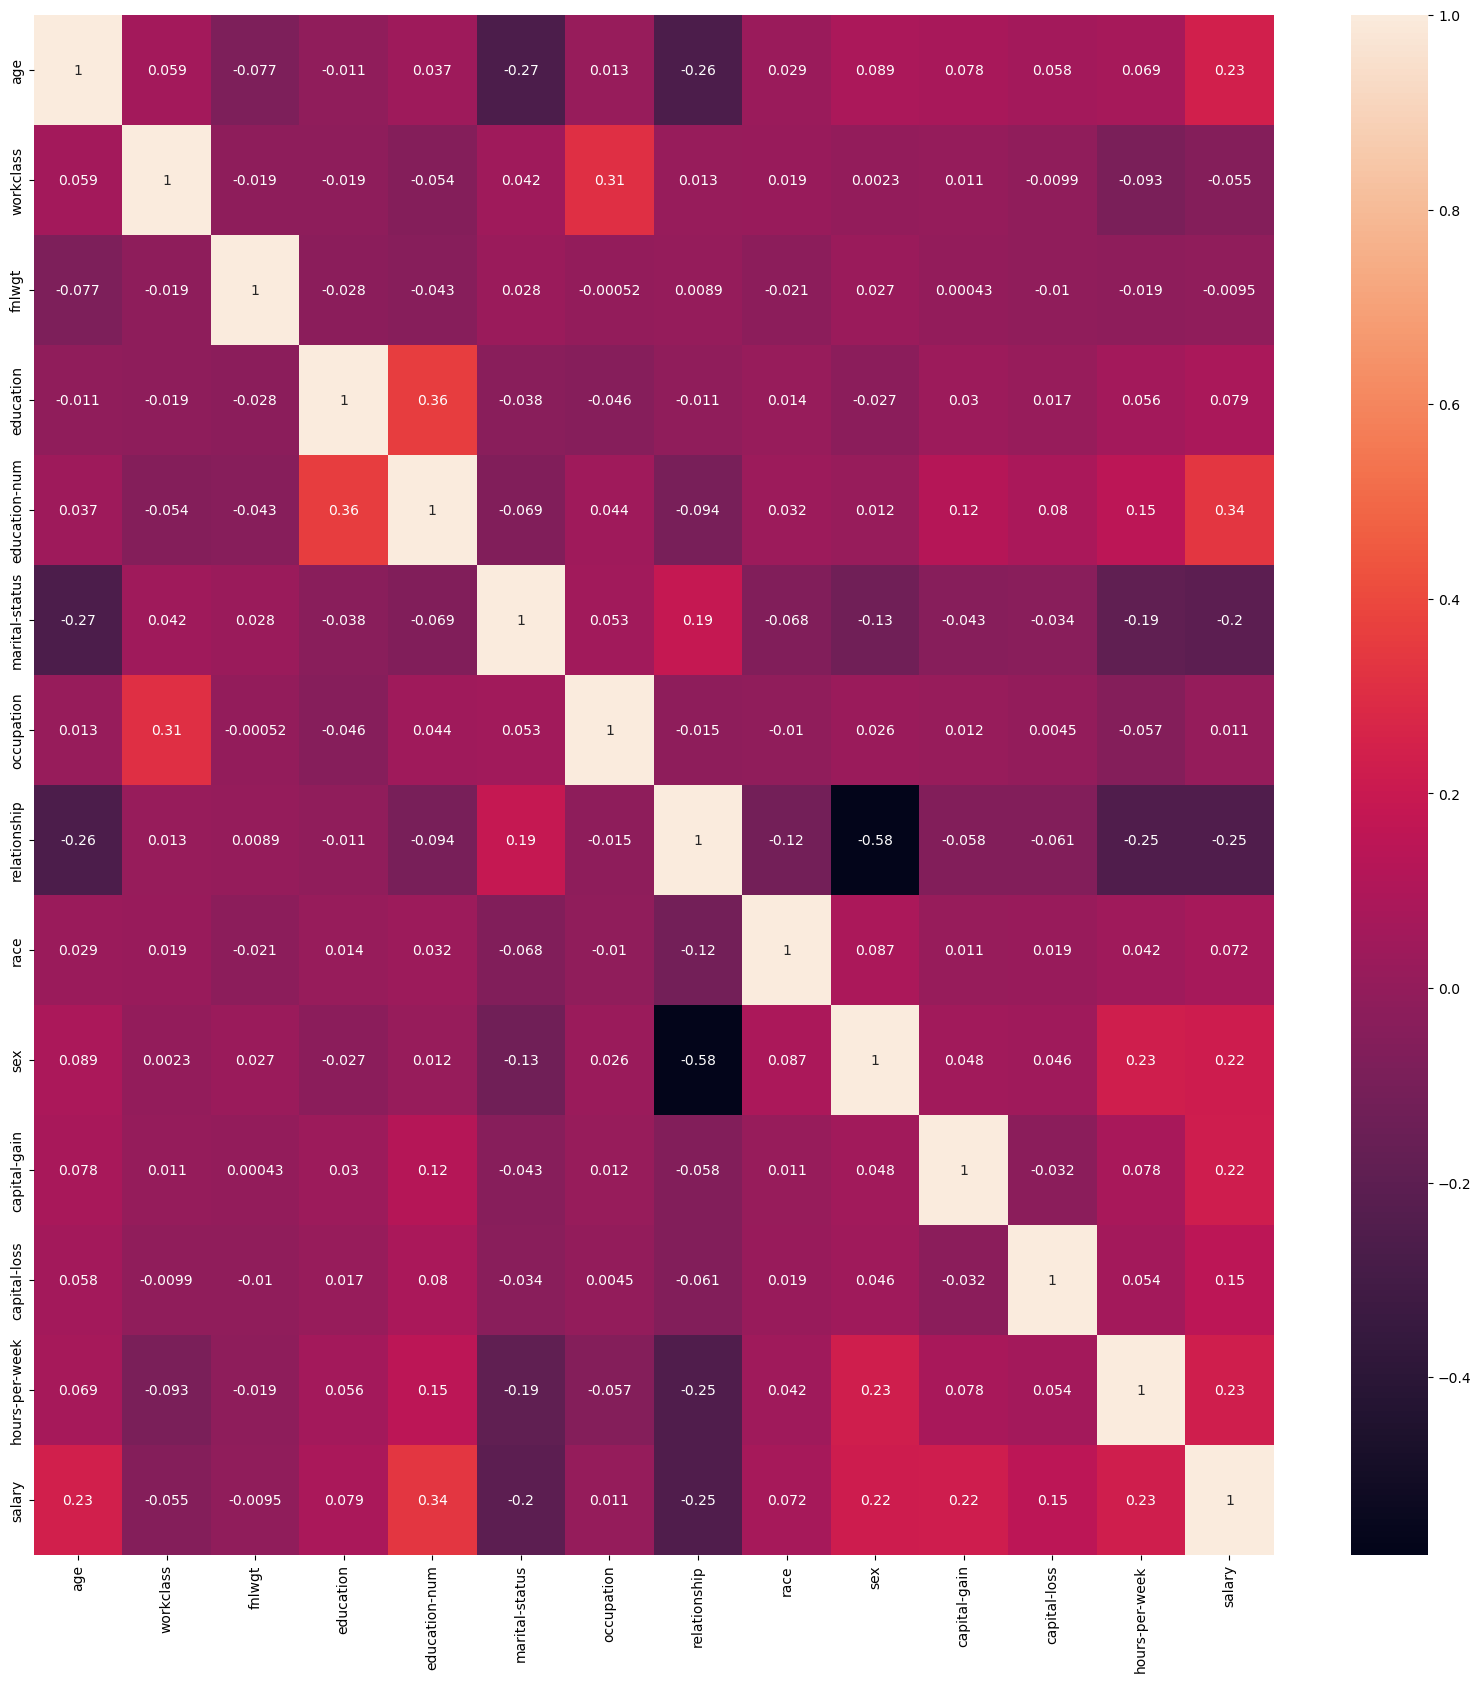

In [256]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

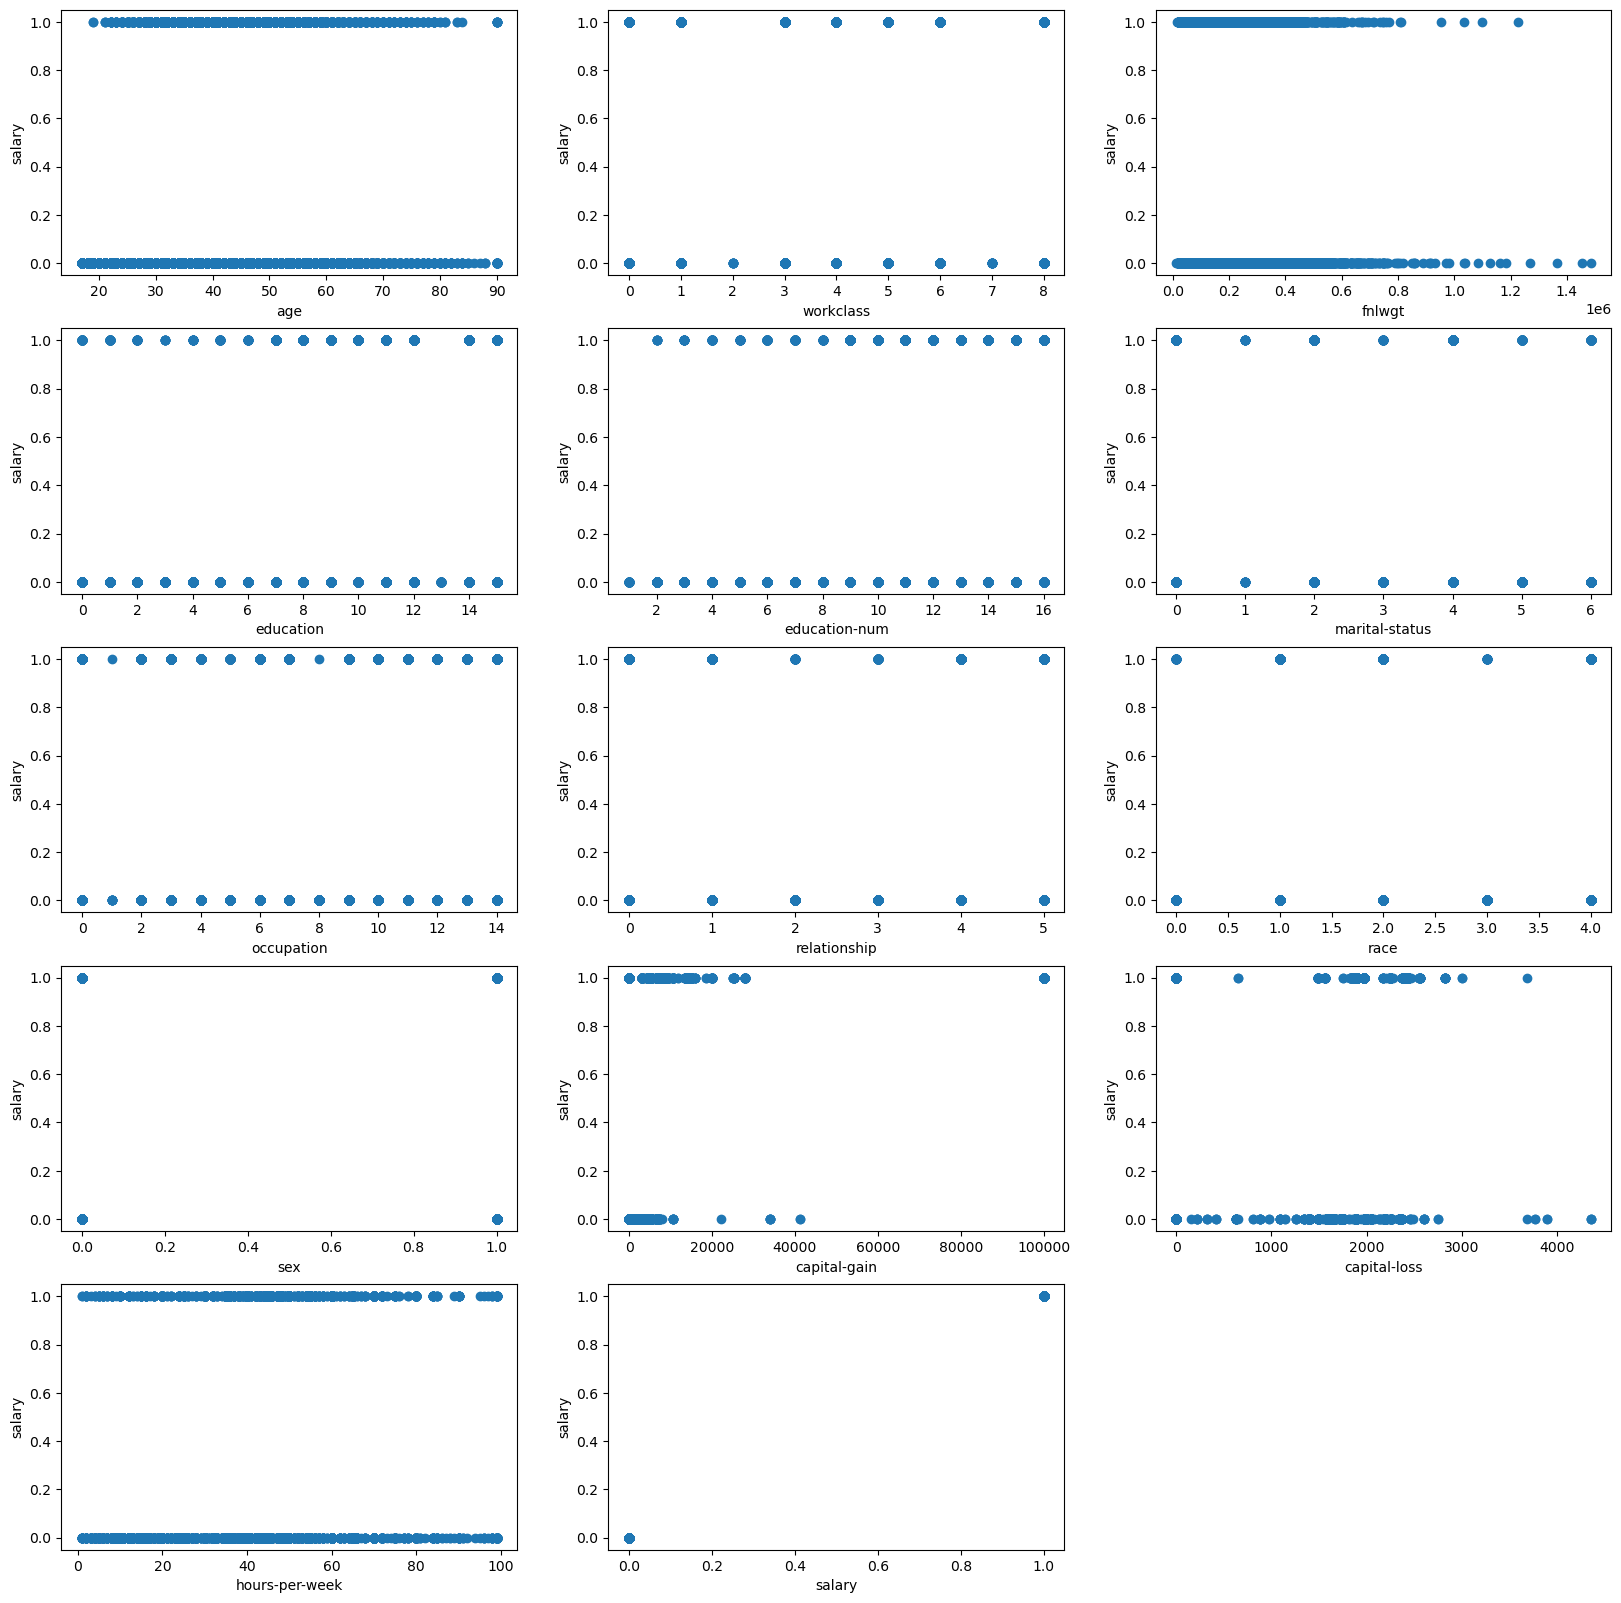

In [257]:
plt.figure(figsize=(20,20))
i=1
for col in data.columns:
    plt.subplot(5,3,i)
    plt.scatter(data[col], data['salary'])
    plt.xlabel(col)
    plt.ylabel('salary')
    i+=1
plt.show()
    

In [258]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mse: ',mse ,' r2: ', r2)

mse:  0.13419602702474767  r2:  0.24146973020982898


In [259]:
data.drop('fnlwgt',axis=1,inplace=True)

In [263]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print('mse: ',mse ,' r2: ', r2)

mse:  0.13363579059960923  r2:  0.2726947186099512
